In [1]:
%matplotlib widget
from easydynamics.Analysis import Analysis

import numpy as np

from easydynamics.sample import GaussianComponent
from easydynamics.sample import LorentzianComponent
from easydynamics.sample import PolynomialComponent
from easydynamics.sample import SampleModel

from easydynamics.Experiment import Experiment

import matplotlib.pyplot as plt


In [2]:

MyAnalysis = Analysis(name='MyAnalysis')
Gaussian1= GaussianComponent(center=-0.4e-3,width=0.5e-3,amplitude=0.05)
Lorentzian=LorentzianComponent(center=-0.4e-3, width=2e-3, amplitude=0.002)
Polynomial=PolynomialComponent(coefficients=[1e-3])

Sample= SampleModel()
Sample.add_component(Gaussian1)
Sample.add_component(Lorentzian)

Background=SampleModel()
Background.add_component(Polynomial)

MyAnalysis.set_sample_model(Sample)
MyAnalysis.set_background_model(Background)

vanadium_data=Experiment.load_example_vanadium_data_1d()
vanadium_data.plot()

MyAnalysis.set_data(vanadium_data)



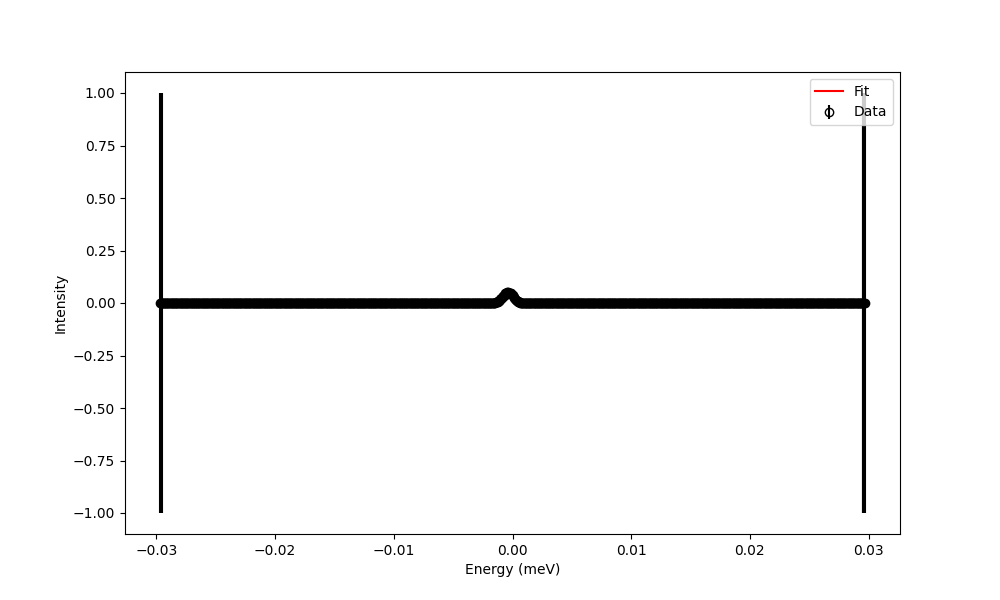

(0.0, 0.07)

In [3]:
fig=MyAnalysis.plot_data_and_fit()
# fig.xlim(-0.02, 0.02)
# fig.ylim(0, 0.07)

fig.axes[0].set_xlim(-0.02, 0.02)
fig.axes[0].set_ylim(0, 0.07)

In [4]:
fit_result=MyAnalysis.fit()

In [5]:
MyAnalysis.get_fit_parameters()

[<Parameter 'center': -0.0004 ± 0.0000 meV, bounds=[-inf:inf]>,
 <Parameter 'width': 0.0004 ± 0.0000 meV, bounds=[-inf:inf]>,
 <Parameter 'amplitude': 0.0526 ± 0.0036, bounds=[-inf:inf]>,
 <Parameter 'center': -0.0005 ± 0.0001 meV, bounds=[-inf:inf]>,
 <Parameter 'width': 0.0005 ± 0.0004 meV, bounds=[-inf:inf]>,
 <Parameter 'amplitude': 0.0028 ± 0.0043, bounds=[-inf:inf]>,
 <Parameter 'c0': 0.0002 ± 0.0000, bounds=[-inf:inf]>]

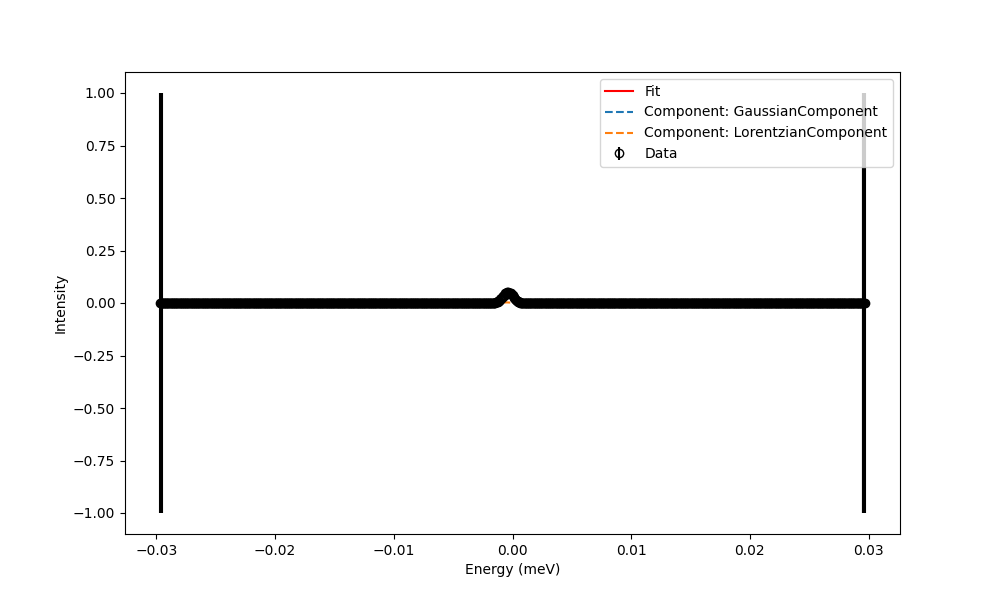

(0.0, 0.07)

In [6]:
fig=MyAnalysis.plot_data_and_fit(plot_individual_components=True)
# fig.xlim(-0.02, 0.02)
# fig.ylim(0, 0.07)

fig.axes[0].set_xlim(-0.02, 0.02)
fig.axes[0].set_ylim(0, 0.07)



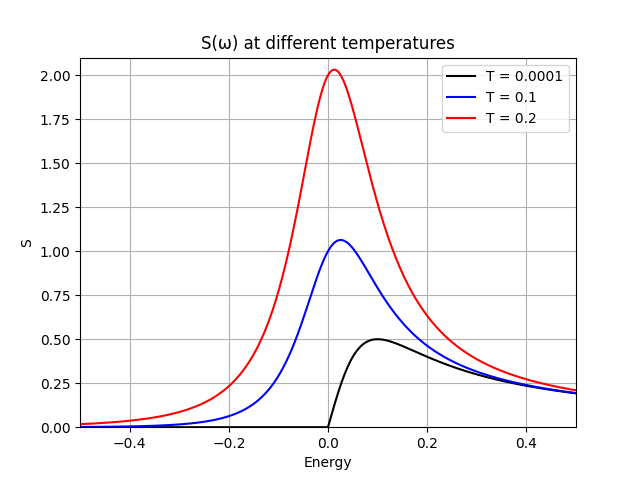

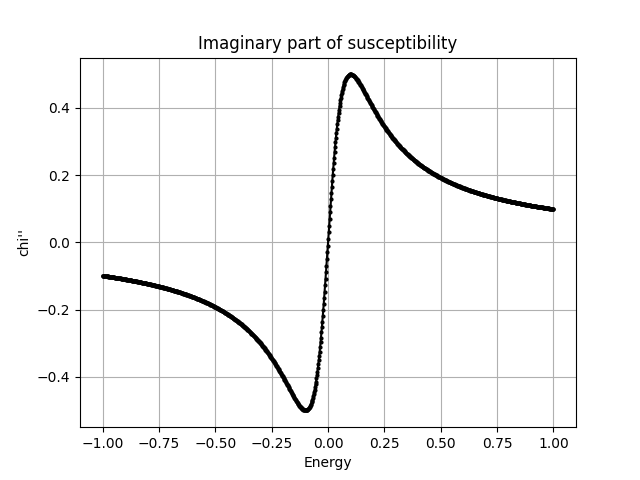

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define omega axis
xx = np.linspace(-1, 1, 1000)
gamma = 0.1
omega_0 = 0
omega = xx

# Calculate chi''
chi = gamma * omega / (omega**2 + gamma**2)

# Plot chi''
plt.figure()
plt.plot(xx, chi, 'ko-', markersize=2)
plt.xlabel('Energy')
plt.ylabel("chi''")
plt.title("Imaginary part of susceptibility")
plt.grid(True)

# Plot S(omega) at different temperatures
plt.figure()
plt.title("S(ω) at different temperatures")

for T, color in zip([0.0001, 0.1, 0.2], ['k', 'b', 'r']):
    beta = 1.0 / T
    # Bose factor; handle large negative omega to avoid overflow
    with np.errstate(over='ignore', divide='ignore', invalid='ignore'):
        bose = 1.0 / (np.exp(beta * omega) - 1)
        bose[np.isnan(bose)] = 0
        bose[np.isinf(bose)] = 0

    S = (1 + bose) * chi
    plt.plot(xx, S, color + '-', label=f"T = {T}")

plt.axis([-0.5, 0.5, 0, 2.1])
plt.xlabel('Energy')
plt.ylabel('S')
plt.legend()
plt.grid(True)

plt.show()


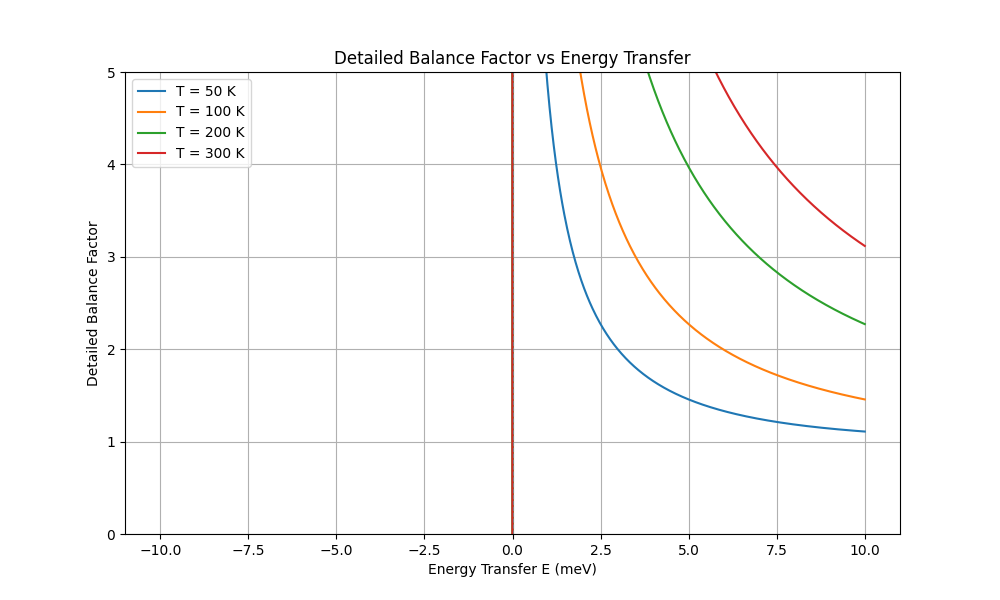

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def detailed_balance(E, T):
    """
    Compute the detailed balance factor: 1 / (1 - exp(-E / kT))

    Args:
        E (np.ndarray): Energy transfer array (in meV)
        T (float): Temperature in Kelvin

    Returns:
        np.ndarray: Detailed balance factor
    """
    k_B_meV = 8.617333e-2  # Boltzmann constant in meV/K
    kT = k_B_meV * T
    with np.errstate(divide='ignore', invalid='ignore', over='ignore'):
        db = 1.0 / (1.0 - np.exp(-E / kT))
        db[np.isinf(db)] = 0.0
        db[np.isnan(db)] = 0.0
    return db

# Energy range (symmetric around 0)
E = np.linspace(-10, 10, 1000)

# Plot for multiple temperatures
temperatures = [50, 100, 200, 300]
plt.figure(figsize=(10, 6))
for T in temperatures:
    plt.plot(E, detailed_balance(E, T), label=f"T = {T} K")

plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.ylim(0, 5)
plt.xlabel("Energy Transfer E (meV)")
plt.ylabel("Detailed Balance Factor")
plt.title("Detailed Balance Factor vs Energy Transfer")
plt.legend()
plt.grid(True)
plt.show()
